In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


<br>
<br>

# 데이터 로드

In [2]:
# 데이터셋 로드
train_data = pd.read_csv('./dataset/tata_stock/train.csv')
test_data = pd.read_csv('./dataset/tata_stock/test.csv')

In [3]:
# 훈련셋 헤드 출력
train_data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# 훈련셋 테일 출력
train_data.tail()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
# 훈련셋 크기
train_data.shape


(2035, 8)

In [6]:
# 테스트셋 크기
test_data.shape


(16, 8)

<br>
<br>

# 전처리 - 훈련셋

In [7]:
# 시작가인 Open 항목만 추출
train_data_new = train_data.iloc[:, 1:2].values
train_data_new

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [8]:
# 훈련셋을 0~1 사이로 정규화
scaler = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = scaler.fit_transform(train_data_new)
train_data_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [9]:
# 입력의 날짜 시간 범위
time_step = 60

x_train = []
y_train = []

# 타임 스텝만큼 입력이 들어가고 그 다음 날의 값을 예측
for i in range(time_step, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])

# 리스트를 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

주식은 대표적인 시계열 데이터입니다. 입력으로 60일의 연속적인 주가를 넣고 바로 다음 날의 주가를 예측합니다. 전체 데이터에서 처음 시작 60일 이후부터 for 구문을 돌면서 60일 단위로 훈련셋을 작성합니다.
<br>
<br>
<br>

In [10]:
# 훈련셋 크기
x_train.shape


(1975, 60)

In [11]:
# 훈련셋 출력
x_train


array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [12]:
# LSTM의 입력 형식에 맞게 배열의 차원 변환
# (샘플 수, 타임 스텝) -> (샘플 수, 타임 스텝, 특성 수)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [13]:
# 훈련셋 크기
x_train.shape


(1975, 60, 1)

In [14]:
# 훈련셋 출력
x_train


array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

In [15]:
# 훈련셋 라벨 크기
y_train.shape


(1975,)

In [16]:
# 훈련셋 라벨 출력
y_train


array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

In [17]:
# 훈련셋에서 검증셋 분리
x_val = x_train[:100]
x_train_new = x_train[100:]

y_val = y_train[:100]
y_train_new = y_train[100:]

<br>
<br>

# 전처리 - 테스트셋

In [18]:
# 시작가인 Open 항목만 추출
test_data_new = test_data.iloc[:, 1:2].values
test_data_new


array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [19]:
# 테스트셋을 0~1 사이로 정규화
test_data_scaled = scaler.transform(test_data_new)
test_data_scaled


array([[0.56366586],
       [0.56772101],
       [0.60158151],
       [0.60502839],
       [0.6350365 ],
       [0.63260341],
       [0.6025953 ],
       [0.58860503],
       [0.54298459],
       [0.54298459],
       [0.54501217],
       [0.51459854],
       [0.55109489],
       [0.57745337],
       [0.60381184],
       [0.62226277]])

In [20]:
# 테스트셋에서 타임 스텝을 계산하기 위해 훈련셋과 테스트셋을 합침
data_total = np.concatenate((train_data_scaled, test_data_scaled), axis=0)

# 테스트셋을 위한 타임 스텝만큼만 데이터 분리
data_total_new = data_total[len(data_total) - len(test_data) - time_step:]
data_total_new.shape


(76, 1)

테스트셋은 모두 16일의 데이터로 구성되어 있습니다. 각 주가마다 그 이전의 60일의 데이터가 필요합니다. 그래서 우선 훈련셋과 테스트셋을 합칩니다. 그리고 테스트셋에서 60일 이전만큼만(16+60=76) 데이터를 분리합니다.
<br>
<br>
<br>

In [21]:
x_test = []
y_test = []

# 타임 스텝만큼 입력이 들어가고 그 다음 날의 값을 예측
for i in range(time_step, len(data_total_new)):
    x_test.append(data_total_new[i-60:i, 0])
    y_test.append(data_total_new[i, 0])

# 리스트를 배열로 변환
x_test, y_test = np.array(x_test), np.array(y_test)

# LSTM의 입력 형식에 맞게 배열의 차원 변환
# (샘플 수, 타임 스텝) -> (샘플 수, 타임 스텝, 특성 수)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape


(16, 60, 1)

이전에 만든 76개의 데이터를 사용하여 60 타임 스텝만큼 테스트셋 16개의 데이터를 새로 생성합니다.

<br>
<br>

# 모델 생성

In [22]:
def build_model():
    
    model = models.Sequential()
    
    model.add(layers.LSTM(64,
                          dropout=0.1,
                          recurrent_dropout=0.5,
                          return_sequences=True,
                          input_shape = (time_step, 1)))

    model.add(layers.LSTM(64, 
                          dropout=0.1,
                          recurrent_dropout=0.5,
                          return_sequences=True))

    model.add(layers.LSTM(64, 
                          dropout=0.1,
                          recurrent_dropout=0.5,
                          return_sequences=True))
    
    model.add(layers.LSTM(64, 
                          dropout=0.1,
                          recurrent_dropout=0.5))

    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    
    return model              

여러 개의 LSTM 층을 중첩해서 모델을 만듭니다. 이전에는 layers.Dropout()으로 드롭아웃을 추가했지만, LSTM에서는 함수 파라미터로 바로 설정합니다. 출력층(dropout)과 순환층(recurrent_dropout) 2개의 드롭아웃이 존재합니다.

중첩 LSTM의 경우 return_sequences를 True로 변경해야 합니다. 그래야지 각 타임 스텝의 출력이 모두 아래 층 LSTM으로 전달됩니다. 제일 끝의 LSTM은 return_sequences가 False(디폴트)이며, 마지막 타임 스텝의 출력만 다음 층에서 사용합니다.

Dense()나 Conv2D()는 디폴트 활성화 함수가 None이기 때문에 sigmoid나 relu로 설정을 해주었습니다. LSTM은 디폴트가 tanh이며, 여기서는 별도의 수정없이 그대로 적용합니다.

회귀 모델이기 때문에 활성화 함수가 없는 Dense() 함수로 최종 주가를 예측합니다.

<br>
<br>

# 훈련 및 평가

In [23]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=200,
                    batch_size=32,
                    validation_data=(x_val, y_val))


Train on 1875 samples, validate on 100 samples
Epoch 1/200
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0130 - mean_absolute_error: 0.0795 - val_loss: 0.0218 - val_mean_absolute_error: 0.1360
Epoch 2/200
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0094 - mean_absolute_error: 0.0623 - val_loss: 0.1007 - val_mean_absolute_error: 0.3129
Epoch 3/200
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0604 - val_loss: 0.0344 - val_mean_absolute_error: 0.1766
Epoch 4/200
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0072 - mean_absolute_error: 0.0585 - val_loss: 0.0392 - val_mean_absolute_error: 0.1906
Epoch 5/200
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0533 - val_loss: 0.0638 - val_mean_absolute_error: 0.2468
Epoch 6/200
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.05

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0229 - val_loss: 0.0018 - val_mean_absolute_error: 0.0332
Epoch 98/200
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0013 - mean_absolute_error: 0.0238 - val_loss: 0.0094 - val_mean_absolute_error: 0.0923
Epoch 99/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0174 - val_mean_absolute_error: 0.1287
Epoch 100/200
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0241 - val_loss: 0.0066 - val_mean_absolute_error: 0.0752
Epoch 101/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0230 - val_loss: 0.0011 - val_mean_absolute_error: 0.0232
Epoch 102/200
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0222 - val_loss: 9.2910e-04 - val_mean_absolute_

Epoch 145/200
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0010 - mean_absolute_error: 0.0204 - val_loss: 0.0083 - val_mean_absolute_error: 0.0871
Epoch 146/200
1875/1875 [==============================] - 21s 11ms/step - loss: 9.3543e-04 - mean_absolute_error: 0.0205 - val_loss: 0.0034 - val_mean_absolute_error: 0.0523
Epoch 147/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0210 - val_loss: 0.0058 - val_mean_absolute_error: 0.0709
Epoch 148/200
1875/1875 [==============================] - 21s 11ms/step - loss: 9.3492e-04 - mean_absolute_error: 0.0204 - val_loss: 0.0069 - val_mean_absolute_error: 0.0778
Epoch 149/200
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0012 - val_mean_absolute_error: 0.0262
Epoch 150/200
1875/1875 [==============================] - 21s 11ms/step - loss: 8.5468e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0

Epoch 192/200
1875/1875 [==============================] - 20s 11ms/step - loss: 7.9116e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0015 - val_mean_absolute_error: 0.0301
Epoch 193/200
1875/1875 [==============================] - 23s 12ms/step - loss: 7.7502e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0011 - val_mean_absolute_error: 0.0251
Epoch 194/200
1875/1875 [==============================] - 22s 12ms/step - loss: 8.2755e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0014 - val_mean_absolute_error: 0.0286
Epoch 195/200
1875/1875 [==============================] - 22s 12ms/step - loss: 8.1784e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307
Epoch 196/200
1875/1875 [==============================] - 28s 15ms/step - loss: 7.3167e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0014 - val_mean_absolute_error: 0.0293
Epoch 197/200
1875/1875 [==============================] - 27s 14ms/step - loss: 8.7643e-04 - mean_absolute_error: 0.0193 - v

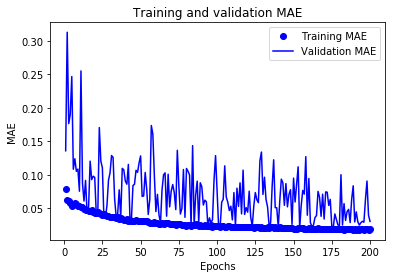

In [24]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')      # bo -> 파란색 점
plt.plot(epochs, val_mae, 'b', label='Validation MAE') # b -> 파란색 실선
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [25]:
# 모델 저장
model.save('./model/stock_price_model.h5')

<br>
<br>

# 테스트셋 확인

In [26]:
# 저장된 모델 파일 로드
model = models.load_model('./model/stock_price_model.h5')

In [27]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


16/16 [==============================] - 1s 51ms/step


[0.020717263221740723, 0.11425551027059555]

In [28]:
# 테스트셋 예측
results = model.predict(x_test)

# 스케일된 예측값을 실제값으로 변경
results = scaler.inverse_transform(results)

# 스케일러 변환 형식에 맞게 차원 변경
y_test = y_test.reshape(-1, 1)

# 스케일된 테스트셋값을 실제값으로 변경
y_test_real = scaler.inverse_transform(y_test)

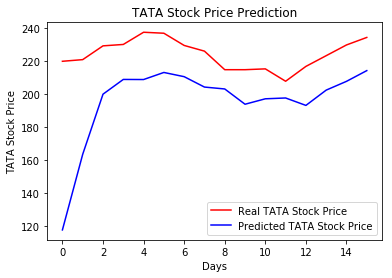

In [30]:
plt.plot(y_test_real, color = 'red', label = 'Real TATA Stock Price')
plt.plot(results, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('TATA Stock Price')
plt.legend()

plt.show()


테스트셋의 예측 주가와 실제 주가의 그래프입니다. 첫 날은 차이가 많이 나지만, 그 이후로는 상당히 비슷한 형태를 보이고 있습니다. 

이번 예제에서는 단순히 시작가만 특성으로 사용했습니다. 하지만 실제 모델에서는 시가, 종가, 평균이동선 등 다양한 수치들을 피처 엔지니어링을 하여 사용합니다.